The Grammar of Graphics:
1. Data - Raw data that we'd like to visualize
2. Geometries - Shapes that we use to visualize data
3. Aesthetics - Properties of geometries(size, color, shape, etc)
4. Scales - Mappings between geometries and aesthetics.

In [93]:
# Reading / importing data.
# read_csv() - Reads each file in row with comma separated

In [94]:
library(tidyverse)
college_data <- read_csv("http://672258.youcanlearnit.net/college.csv")

Rows: 1269 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, city, state, region, highest_degree, control, gender, loan_de...
dbl (9): id, admission_rate, sat_avg, undergrads, tuition, faculty_salary_av...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Cleaning the Data

In [95]:
summary(college_data)

       id             name               city              state          
 Min.   :100654   Length:1269        Length:1269        Length:1269       
 1st Qu.:153250   Class :character   Class :character   Class :character  
 Median :186283   Mode  :character   Mode  :character   Mode  :character  
 Mean   :186988                                                           
 3rd Qu.:215284                                                           
 Max.   :484905                                                           
    region          highest_degree       control             gender         
 Length:1269        Length:1269        Length:1269        Length:1269       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

In [96]:
# grouping the features/column by the rows values/numbers.
college_data <- college_data %>% mutate(state= as.factor(state), region= as.factor(region), highest_degree=as.factor(highest_degree), control=as.factor(control), gender=as.factor(gender))

In [97]:
summary(college_data)

       id             name               city               state    
 Min.   :100654   Length:1269        Length:1269        PA     :101  
 1st Qu.:153250   Class :character   Class :character   NY     : 84  
 Median :186283   Mode  :character   Mode  :character   CA     : 71  
 Mean   :186988                                         TX     : 63  
 3rd Qu.:215284                                         OH     : 52  
 Max.   :484905                                         IL     : 47  
                                                        (Other):851  
       region      highest_degree    control      gender     admission_rate  
 Midwest  :353   Associate:  20   Private:763   CoEd :1237   Min.   :0.0509  
 Northeast:299   Bachelor : 200   Public :506   Men  :   4   1st Qu.:0.5339  
 South    :459   Graduate :1049                 Women:  28   Median :0.6687  
 West     :158                                               Mean   :0.6501  
                                                  

In [98]:
# show the unique values
unique(college_data$loan_default_rate)

# R doesnot represent null value as "NULL" -> Its "Na"

[1] "0.077" "0.136" "0.106" "0.111" "0.045" "0.062" "0.096" "0.007" "0.103"
 [10] "0.063" "0.048" "0.061" "0.078" "0.075" "0.114" "0.102" "0.066" "0.044"
 [19] "0.125" "0.315" "0.156" "0.128" "0.172" "0.187" "0.169" "0.18"  "0.171"
 [28] "0.089" "0.149" "0.109" "0.091" "0.086" "0.068" "0.175" "0.064" "0.031"
 [37] "0.247" "0.073" "0.059" "0.07"  "0"     "0.025" "0.008" "0.06"  "0.028"
 [46] "0.029" "0.027" "0.035" "0.052" "0.038" "0.043" "0.036" "0.015" "0.055"
 [55] "0.058" "0.012" "0.03"  "0.04"  "0.023" "0.069" "0.057" "0.049" "0.032"
 [64] "0.016" "0.092" "0.034" "0.084" "0.022" "0.026" "0.08"  "0.024" "0.033"
 [73] "0.019" "NULL"  "0.039" "0.041" "0.056" "0.047" "0.046" "0.093" "0.143"
 [82] "0.014" "0.101" "0.006" "0.011" "0.132" "0.042" "0.088" "0.053" "0.021"
 [91] "0.018" "0.119" "0.148" "0.054" "0.129" "0.076" "0.05"  "0.02"  "0.147"
[100] "0.065" "0.1"   "0.159" "0.124" "0.051" "0.236" "0.182" "0.2"   "0.144"
[109] "0.081" "0.071" "0.017" "0.087" "0.127" "0.184" "0.083" "0.135" "0.157"
[118] "0.202" "0.204" "0.126" "0.138" "0.037" "0.133" "0.01"  "0.072" "0.108"
[127] "0.134" "0.094" "0.105" "0.067" "0.104" "0.082" "0.123" "0.085" "0.164"
[136] "0.079" "0.09"  "0.095" "0.14"  "0.154" "0.074" "0.117" "0.097" "0.131"
[145] "0.22"  "0.116" "0.121" "0.115" "0.158" "0.009" "0.099" "0.013" "0.19" 
[154] "0.179" "0.16"  "0.176" "0.004" "0.002" "0.005" "0.152" "0.11"  "0.217"
[163] "0.155" "0.306" "0.142" "0.298" "0.218" "0.137" "0.113" "0.215" "0.197"
[172] "0.233" "0.174" "0.13"  "0.003" "0.107" "0.12"  "0.193" "0.118" "0.311"
[181] "0.167" "0.139" "0.153" "0.192" "0.196" "0.122" "0.259" "0.188" "0.334"
[190] "0.186" "0.213" "0.098" "0.284" "0.151" "0.222" "0.237" "0.166" "0.23"

In [99]:
college_data <- college_data %>% mutate( loan_default_rate=as.numeric(loan_default_rate))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [100]:
summary(college_data)

       id             name               city               state    
 Min.   :100654   Length:1269        Length:1269        PA     :101  
 1st Qu.:153250   Class :character   Class :character   NY     : 84  
 Median :186283   Mode  :character   Mode  :character   CA     : 71  
 Mean   :186988                                         TX     : 63  
 3rd Qu.:215284                                         OH     : 52  
 Max.   :484905                                         IL     : 47  
                                                        (Other):851  
       region      highest_degree    control      gender     admission_rate  
 Midwest  :353   Associate:  20   Private:763   CoEd :1237   Min.   :0.0509  
 Northeast:299   Bachelor : 200   Public :506   Men  :   4   1st Qu.:0.5339  
 South    :459   Graduate :1049                 Women:  28   Median :0.6687  
 West     :158                                               Mean   :0.6501  
                                                  

# Visualization 

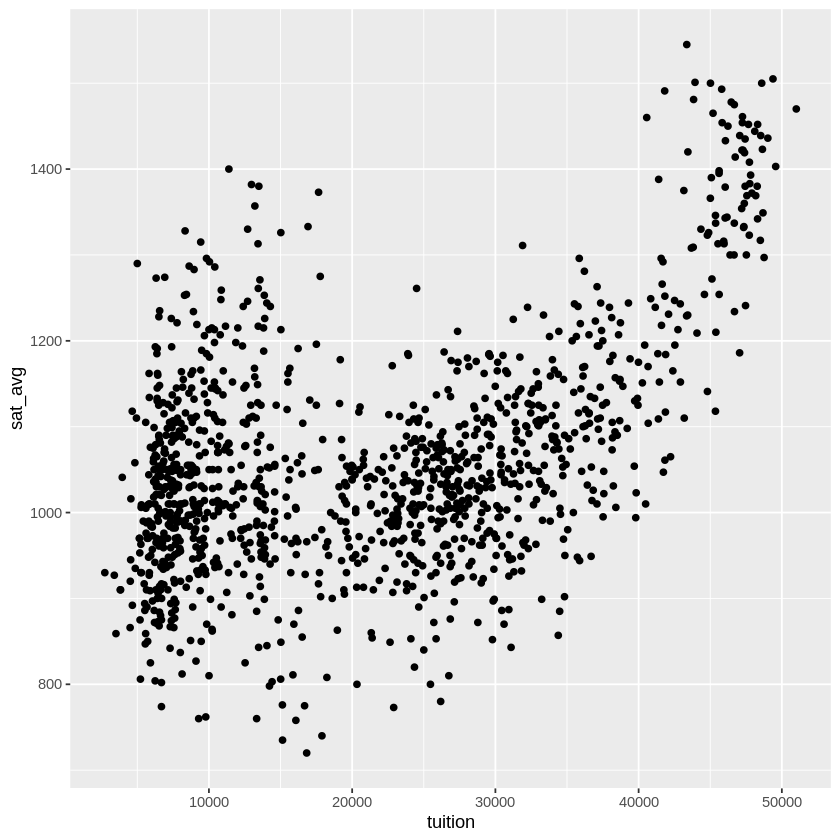

In [101]:
# using ggplot2
# ggplot() # creates an empty plot
# ggplot(data=college_data) # loaded data but plot knows nothing what to do.
# now adding geometry -> geom_point -> mapping with aesthetics for (coordinates ).

ggplot(data=college_data) + geom_point(mapping = aes(x=tuition,y=sat_avg))


# Scatter plots 
  - plot points on a grid in x and y coordinate
  - creates scatterplots with geom_point()
  - requires x and y values
  - Alows the use of other aesthetics such as color, shape, size, transparency(alpha) etc.


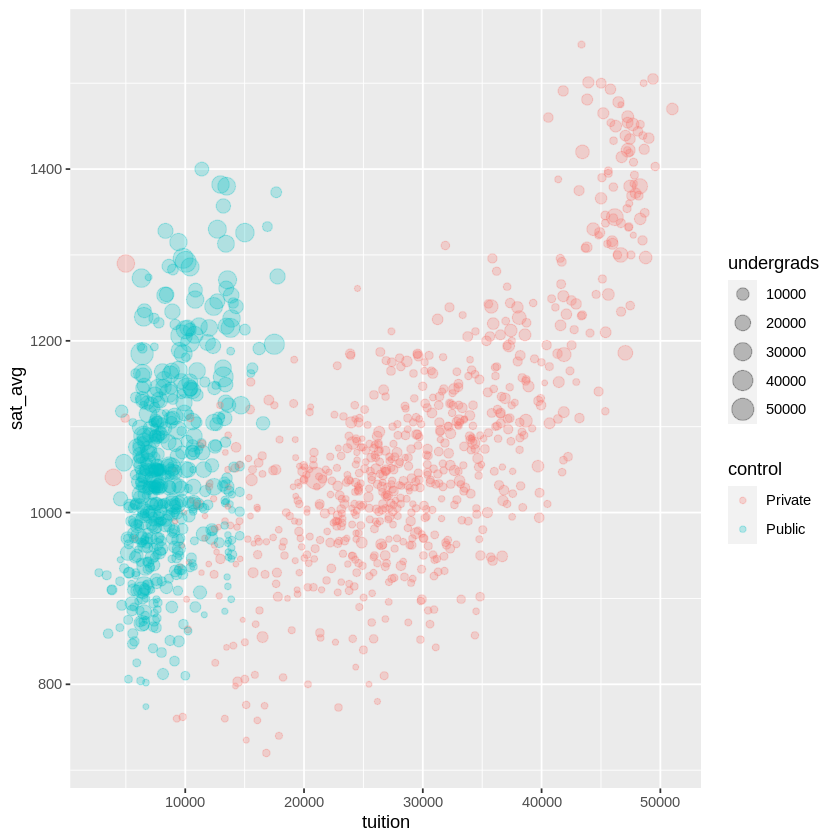

In [102]:

ggplot(data=college_data) + 
  geom_point(mapping = aes(x=tuition,y=sat_avg, color=control, size=undergrads,), alpha=0.25)


# Lines and Smoothers

  - connect the points in a dataset with geom_line()
  - fit a line to pints with geom_smooth()
  - set the same aesthetics for lines as scatterplots


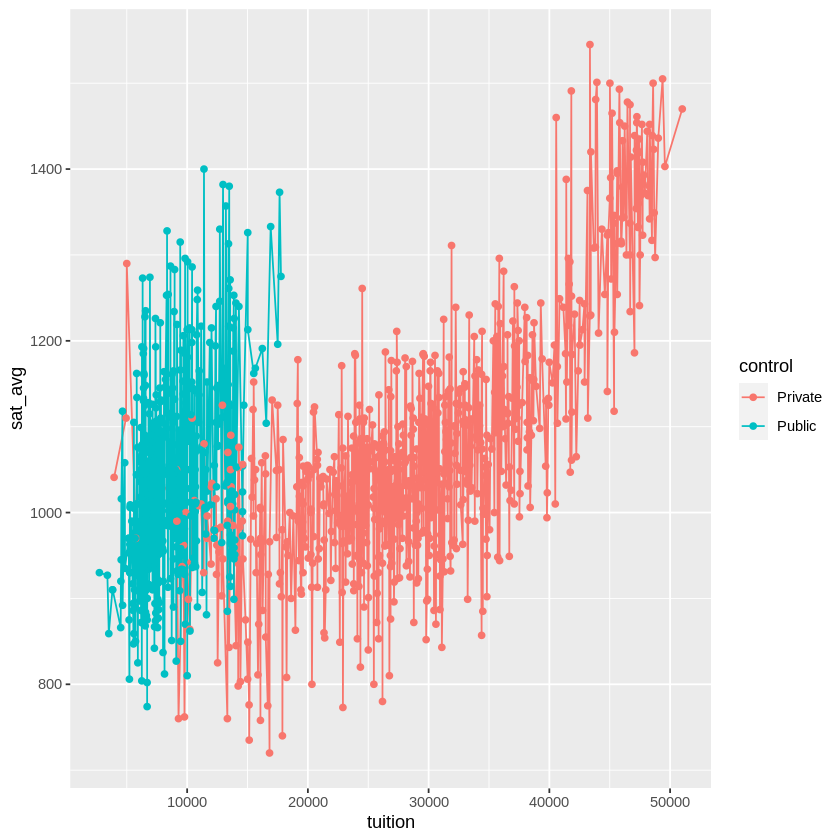

In [103]:

ggplot(data=college_data) + 
  geom_line(mapping = aes(x=tuition,y=sat_avg, color=control)) + geom_point(mapping = aes(x=tuition,y=sat_avg, color=control))


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



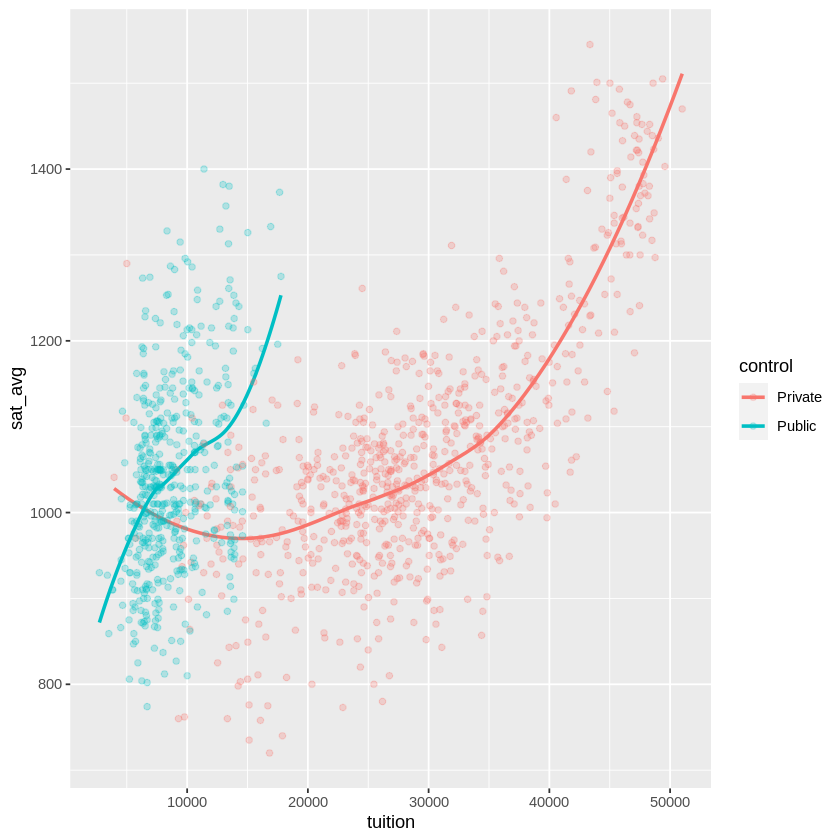

In [104]:
# se - standard error
# geom_smooth() - used to fit a line 

ggplot(data=college_data, mapping = aes(x=tuition,y=sat_avg, color=control)) + geom_smooth(se=FALSE) + geom_point(alpha=0.25)


# Bar and Column charts 

1. geom_bar() 
  - Creates a bar graph
  - Allows user to specify x-axis value
  - Uses count as the y-axis value

2. geom_col()
  - Creates a column graph
  - Allows user to specify x-axis value
  - Allows user to specify y-axis value


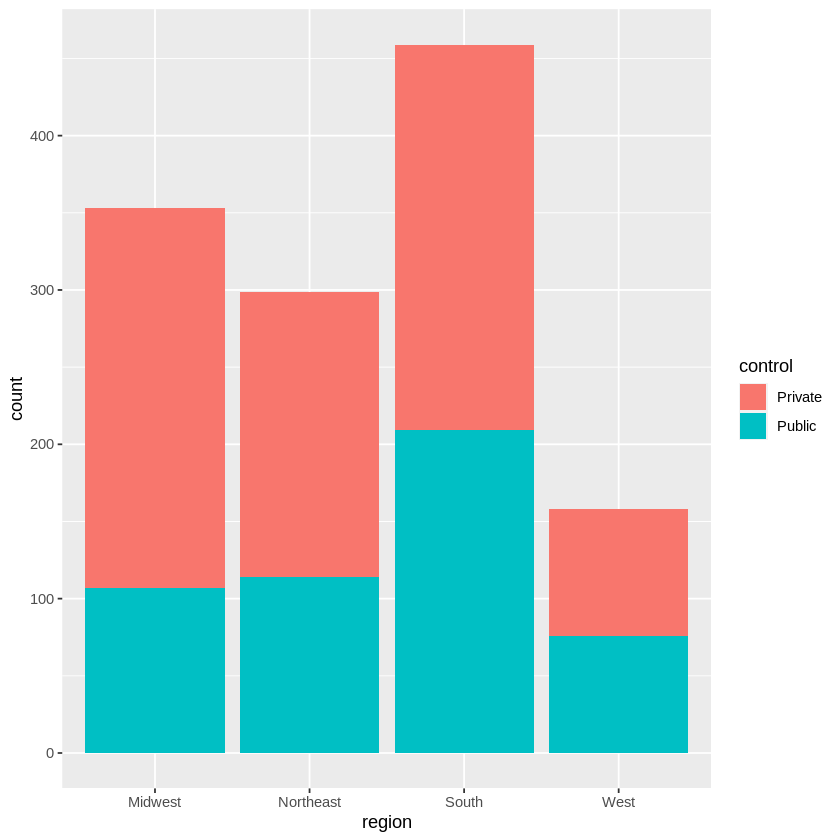

In [105]:
# bar chart
ggplot(data=college_data) + 
  geom_bar(mapping= aes(x=region, fill=control))


In [106]:
# grouping and summarizing by a specific field 
college_data %>% group_by(region) %>% summarize(average_tuition=mean(tuition))

region,average_tuition
<fct>,<dbl>
Midwest,22114.78
Northeast,25297.97
South,17263.13
West,21430.99


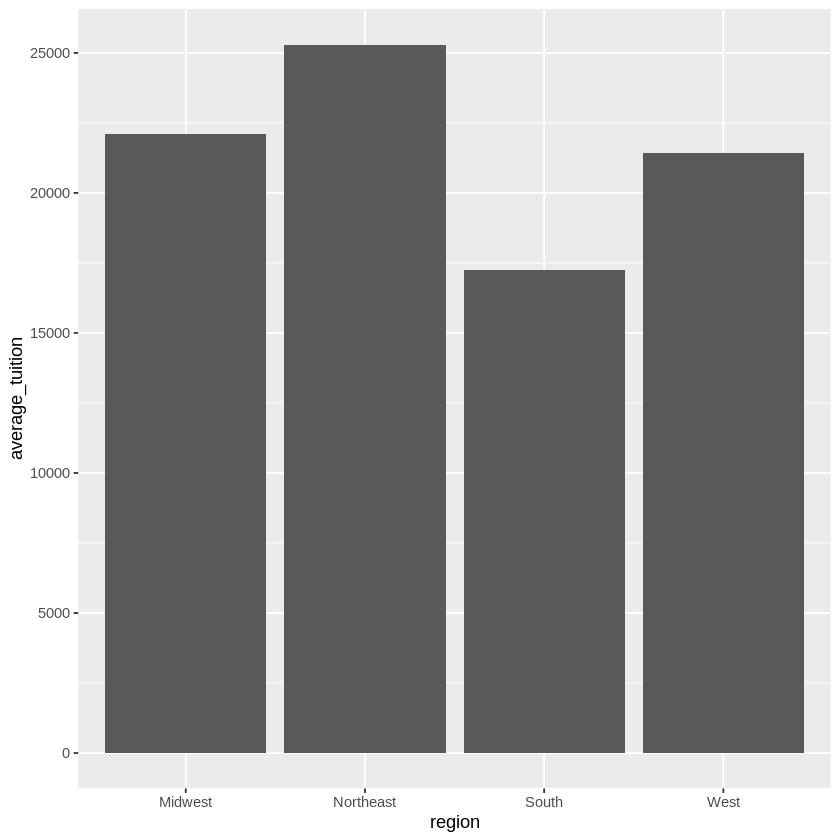

In [107]:
# column chart
college_data %>% group_by(region) %>% summarize(average_tuition=mean(tuition)) %>% ggplot() +
 geom_col(mapping= aes(x=region, y=average_tuition))


# Histograms
 - Histograms are a special case of bar graphs that allow us to work
with continuous variables that don't easily lend themselves to bar graphs.


Warning message:
“`origin` is deprecated. Please use `boundary` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



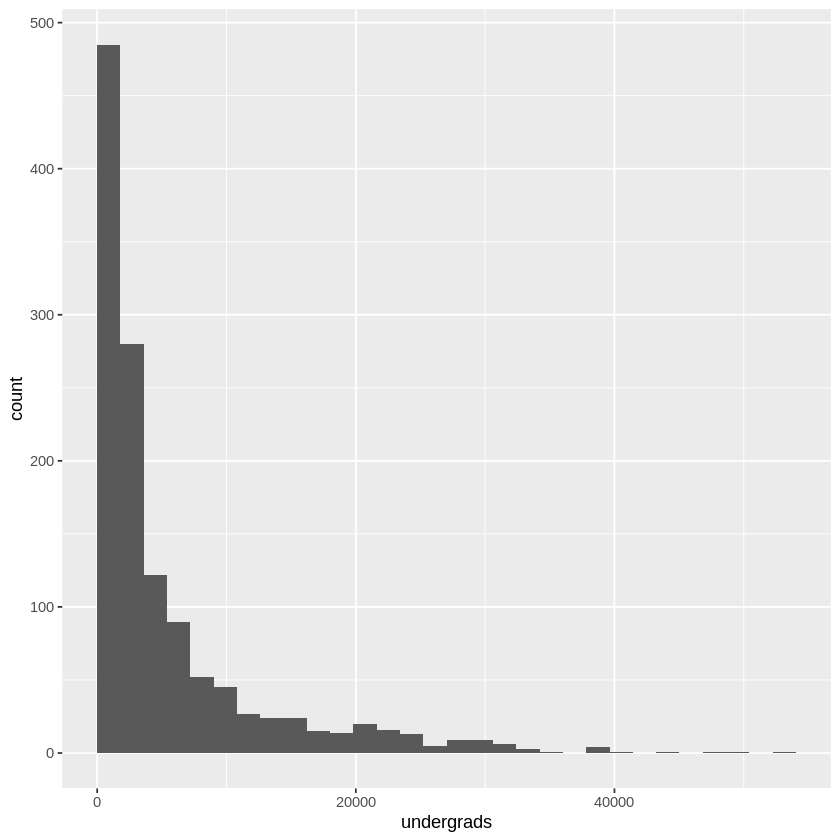

In [108]:
ggplot(data = college_data) + geom_histogram(mapping=aes(x=undergrads), origin=0)

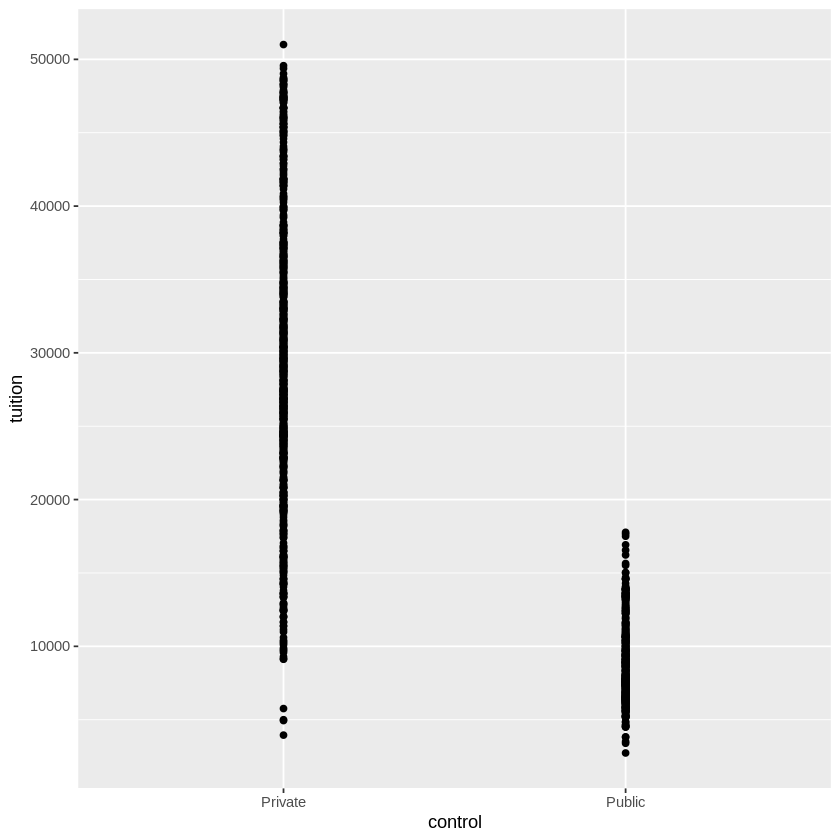

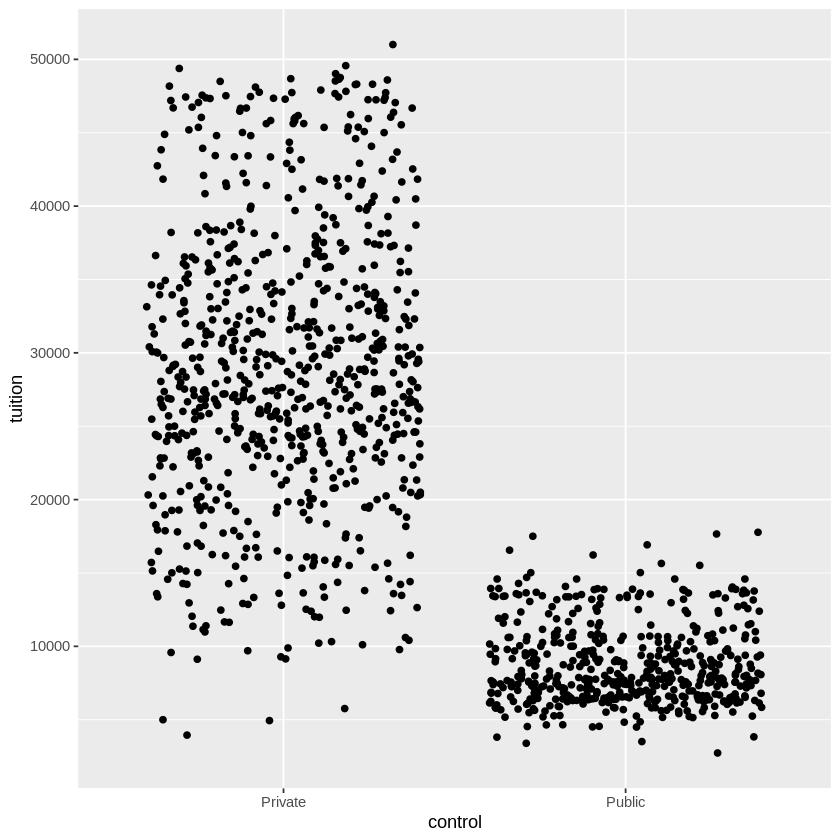

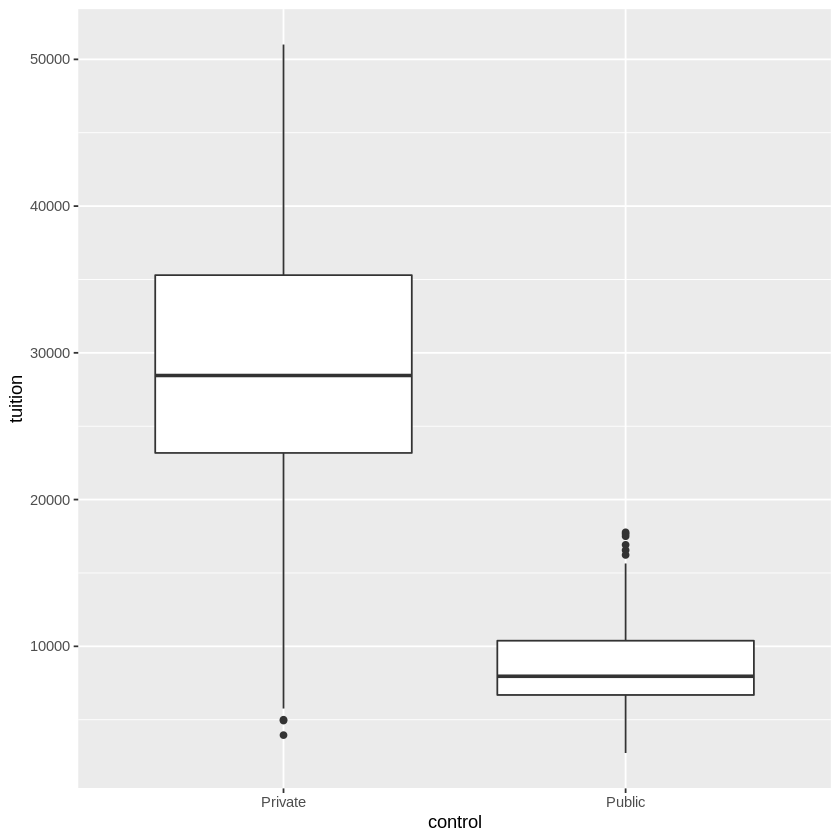

In [109]:
# Boxplots - are tool that helps us visualize a dataset and provide a little more statistical insight than a simple scatter plot.

ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + 
geom_point() 

# jitter plot
ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + 
geom_jitter() 

# box plot
ggplot(data=college_data,mapping = aes(x = control, y=tuition)) + geom_boxplot()

# Modifying the Background

Attributes
  - plot.background
  - plot.panel
  - panel.grid.major
  - panel.grid.minor

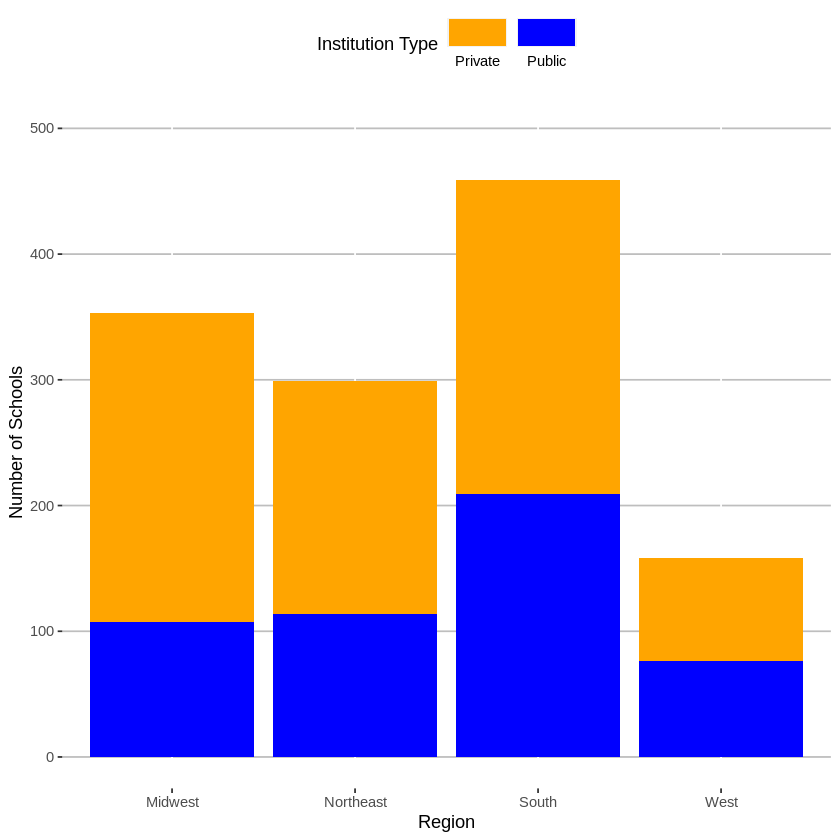

In [110]:
# bar chart with manual changes
ggplot(data=college_data,mapping = aes(x=region, fill=control)) + 
  geom_bar() + 
  theme(panel.background = element_blank()) + 
  theme(plot.background = element_blank()) +
  theme(panel.grid.major.y = element_line(color='grey')) +
  ylab("Number of Schools") +  # scale_y_continuous(name='Number of Schools', limits=c(0,500))
  xlab("Region") + # scale_x_discrete(name='Region')
  ylim(0,500) +
  scale_fill_manual(values=c("Orange","blue"),
    guide=guide_legend(title = "Institution Type", 
      nrow=1,
      label.position = "bottom",
      keywidth=2.5 )) +
  theme(legend.position = "top")



# Annotating Visualizations

1. annotate() adds text and shapes.
2. geom_hline() adds horizontal lines.
3. geom_vline() adds vertical lines.

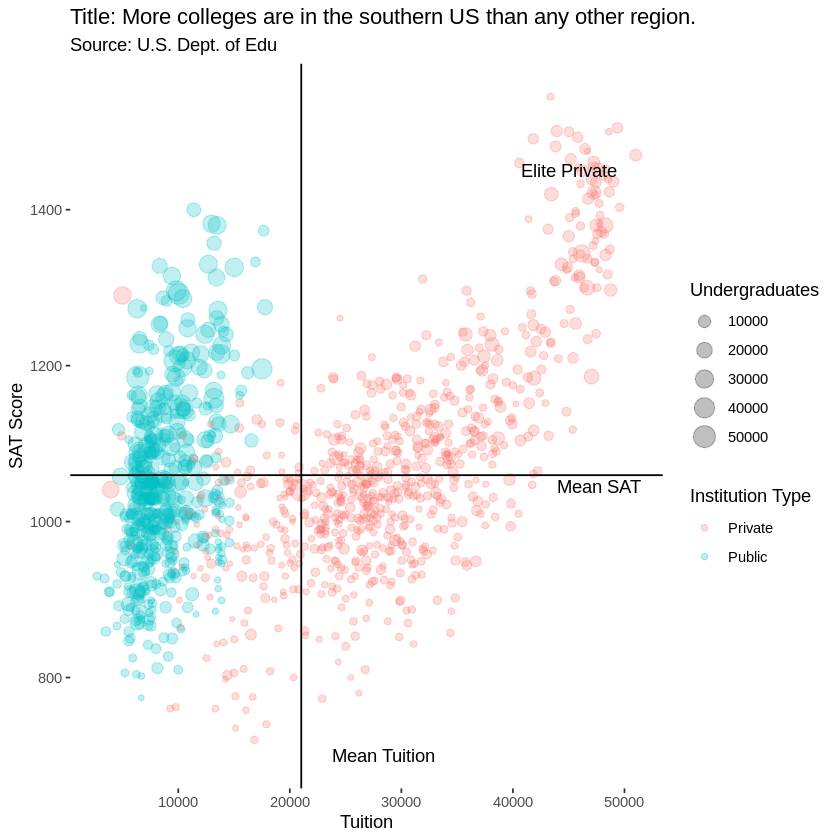

In [131]:
ggplot(data=college_data) +
  geom_point(mapping=aes(x=tuition, y=sat_avg, color= control, size= undergrads),
    alpha=0.25) +
  # theme(panel.background = element_blank()) + 
  # theme(plot.background = element_blank()) +
  # theme(panel.grid.major.y = element_line(color='grey')) +
  # ylab("Number of Schools") +  # scale_y_continuous(name='Number of Schools', limits=c(0,500))
  # xlab("Region") + # scale_x_discrete(name='Region')
  annotate("text", label="Elite Private", x=45000, y=1450) +
  geom_hline(yintercept = mean(college_data$sat_avg)) + 
  annotate("text", label=" Mean SAT", x=47500, y = mean(college_data$sat_avg)-15) +
  geom_vline(xintercept = mean(college_data$tuition)) +
  annotate("text", label="Mean Tuition", y=700, x=mean(college_data$tuition)+7400) +
  theme(panel.background = element_blank(), legend.key = element_blank()) + 
  scale_color_discrete(name="Institution Type") +
  scale_size_continuous(name="Undergraduates") +
  scale_x_continuous(name="Tuition") +
  scale_y_continuous(name="SAT Score") +
  ggtitle("Title: More colleges are in the southern US than any other region.", subtitle = "Source: U.S. Dept. of Edu")

In [141]:
# themes 
# library(tidyverse) 
# library(ggthemes)
# ggplot(data = college_data) + 
#   geom_bar(mapping = aes(x=region, fill=control)) +
#   theme_excel()

# Visualizing data with MAPS